# BDML Coursework
## Elliot Davis - 959547

In this coursework I implement learning algorithms for image classification.

Table of contents:
1. Imports
2. CNN
3. SVM
4. PCA & NN

Here are the websites I mostly used to help point me in the right direction for the algorithms.
[1] CNN cifar 10 https://medium.com/@udolf15/building-a-image-classifier-using-cnn-with-cifar-10-dataset-5682afa4f51
[2] CNN https://www.tensorflow.org/tutorials/images/cnn
[3] PCA https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
[4] SVM https://www.kaggle.com/manikg/training-svm-classifier-with-hog-features
[5] Confusion matrix https://androidkt.com/keras-confusion-matrix-in-tensorboard/

## 1. Imports

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from keras.optimizers import RMSprop
import skimage.feature
from skimage import color
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

## 2. CNN
#### 2.1 Without using HOG features

In [2]:
# [1] [2]

# Load and transpose data to correct format
train_images = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = np.transpose(train_images, [3, 0, 1, 2])
test_images = np.transpose(test_images, [3, 0, 1, 2])

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)
(10000, 32, 32, 3)
(1000, 32, 32, 3)


<Figure size 720x720 with 0 Axes>

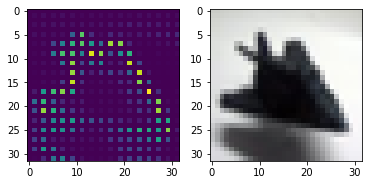

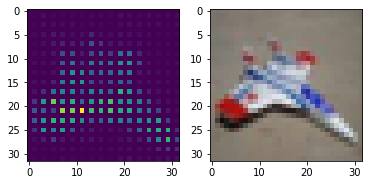

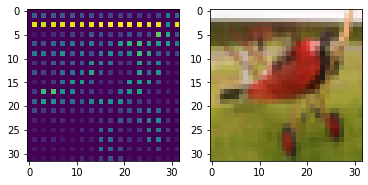

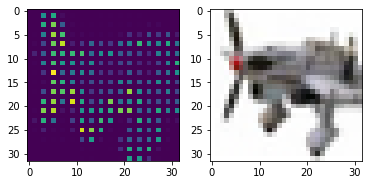

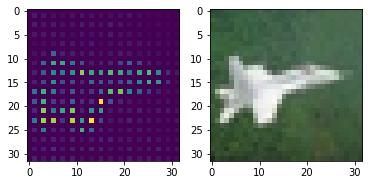

In [3]:
# Printing out some train images next to hog image just to get an idea of what the data set/HOG looks like.
train_images = np.transpose(train_images, [1, 2, 3, 0]) # transposing back for testing purposes
plt.figure(figsize=(10,10))

for i in range(5):
    train_image = train_images[:, :, :, i]
    hog_feature, hog_image = skimage.feature.hog(train_image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)

    plt.figure()
    plt.subplot(121)
    plt.imshow(hog_image)
    plt.subplot(122)
    plt.imshow(train_image)
plt.show()

train_images = np.transpose(train_images, [3, 0, 1, 2]) # transposing back to the right shape

In [4]:
# Creating the convolutional base [1]
model = Sequential()
model.add(Conv2D(16, (3, 3), padding ='same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(Dropout(0.25))

# Flatten and add dense layer to top
model.add(Flatten())
model.add(Dense(256, input_shape = (256, )))
model.add(Dense(10))
model.add(LeakyReLU(0.1))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [5]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=32,
                    validation_data=(test_images, test_labels))

Epoch 1/30
313/313 [==============================] - 24s 75ms/step - loss: 2.2155 - accuracy: 0.2316 - val_loss: 2.1583 - val_accuracy: 0.2850
Epoch 2/30
313/313 [==============================] - 23s 75ms/step - loss: 2.1522 - accuracy: 0.3018 - val_loss: 2.0904 - val_accuracy: 0.3720
Epoch 3/30
313/313 [==============================] - 25s 79ms/step - loss: 2.1091 - accuracy: 0.3483 - val_loss: 2.1030 - val_accuracy: 0.3520
Epoch 4/30
313/313 [==============================] - 24s 76ms/step - loss: 2.0895 - accuracy: 0.3661 - val_loss: 2.0852 - val_accuracy: 0.3700
Epoch 5/30
313/313 [==============================] - 24s 75ms/step - loss: 2.0780 - accuracy: 0.3770 - val_loss: 2.0670 - val_accuracy: 0.3870
Epoch 6/30
313/313 [==============================] - 23s 75ms/step - loss: 2.0488 - accuracy: 0.4081 - val_loss: 2.0260 - val_accuracy: 0.4260
Epoch 7/30
313/313 [==============================] - 23s 75ms/step - loss: 2.0103 - accuracy: 0.4456 - val_loss: 2.0104 - val_accuracy:

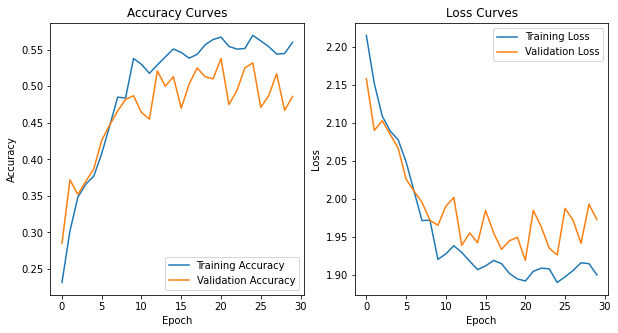

32/32 - 0s - loss: 1.9727 - accuracy: 0.4860
Test accuracy:  48.60000014305115 %
Test loss:  1.9727169275283813


In [6]:
# Accuracy curve
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

# Loss curve
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy: ', test_acc*100, '%')
print('Test loss: ', test_loss)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


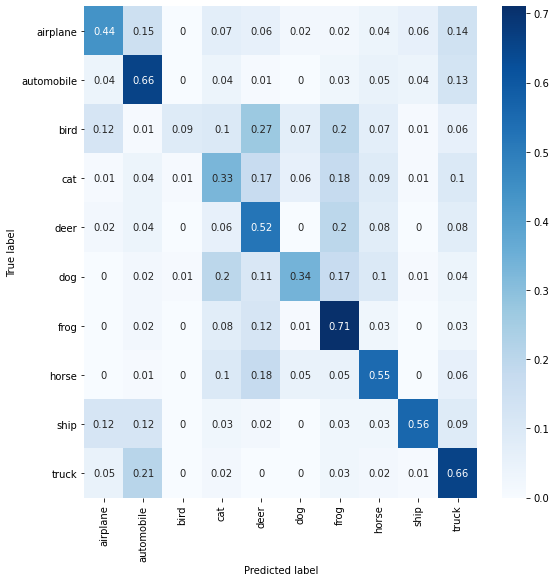

In [7]:
# Confusion matrix diagram [5]
y_pred=model.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

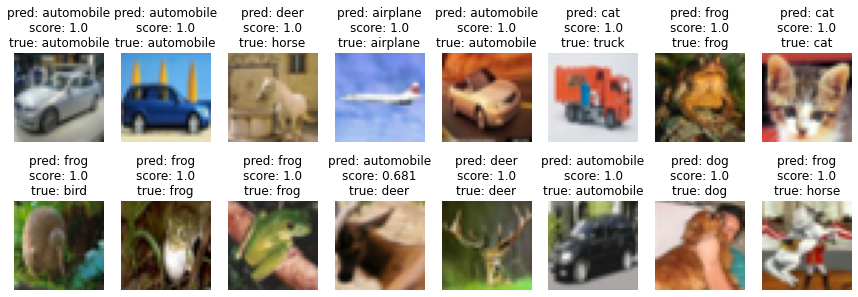

In [8]:
# Displaying random images to see if the predication is correct. [1]
labels_pred_test = model.predict(test_images)
labels_pred_test_classes = np.argmax(labels_pred_test, axis=1)
labels_pred_test_max_probas = np.max(labels_pred_test, axis=1)
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(test_labels))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(test_images[random_index, :])
        pred_label =  cifar10_classes[labels_pred_test_classes[random_index]]
        pred_proba = labels_pred_test_max_probas[random_index]
        true_label = cifar10_classes[test_labels[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

#### 2.2 CNN with HOG features
[4]

In [9]:
# Load and transpose data to correct format
train_images = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = np.transpose(train_images, [3, 0, 1, 2])
test_images = np.transpose(test_images, [3, 0, 1, 2])

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)
(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [10]:
# Transform training data to HOG features
data_gray = [color.rgb2gray(i) for i in train_images]
hog_features = []
for image in data_gray:
    hog_feature = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3])
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)
hog_features.shape

(10000, 15876)

In [11]:
# Reshape hog to useable format
hog_features = hog_features.reshape(10000,126,126,1) # 4 pixels per cell and only in grey scale
hog_features.shape

(10000, 126, 126, 1)

In [12]:
# Transform testing data
test_data_gray = [color.rgb2gray(i) for i in test_images]
test_hog_features = []
for test_image in test_data_gray:
    test_hog_feature = skimage.feature.hog(test_image, pixels_per_cell=[2,2], cells_per_block=[3,3])
    test_hog_features.append(test_hog_feature)
test_hog_features = np.array(test_hog_features)

In [13]:
test_hog_features = test_hog_features.reshape(1000,126,126,1)

In [16]:
# Creating the convolutional base
model = Sequential()
model.add(Conv2D(16, (3, 3), padding ='same', activation = 'relu', input_shape = (126, 126, 1)))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu', input_shape = (126, 126, 1)))
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), padding ='same', activation = 'relu', input_shape = (126, 126, 1)))
model.add(Conv2D(64, (3, 3), padding ='same', activation = 'relu', input_shape = (126, 126, 1)))
model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding = 'valid', data_format = None))
model.add(Dropout(0.25))

# Flatten and add dense layer to top
model.add(Flatten())
model.add(Dense(256, input_shape = (256, )))
model.add(Dense(10))
model.add(LeakyReLU(0.1))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 16)      160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 126, 126, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 63, 63, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)       

In [17]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(hog_features, train_labels, epochs=20, batch_size=32,
                    validation_data=(test_hog_features, test_labels))

Epoch 1/20
313/313 [==============================] - 282s 900ms/step - loss: 2.2706 - accuracy: 0.1557 - val_loss: 2.1925 - val_accuracy: 0.2590
Epoch 2/20
313/313 [==============================] - 309s 988ms/step - loss: 2.1666 - accuracy: 0.2877 - val_loss: 2.1525 - val_accuracy: 0.3150
Epoch 3/20
313/313 [==============================] - 371s 1s/step - loss: 2.1035 - accuracy: 0.3509 - val_loss: 2.1145 - val_accuracy: 0.3440
Epoch 4/20
313/313 [==============================] - 362s 1s/step - loss: 2.0630 - accuracy: 0.3947 - val_loss: 2.0888 - val_accuracy: 0.3710
Epoch 5/20
313/313 [==============================] - 360s 1s/step - loss: 2.0217 - accuracy: 0.4389 - val_loss: 2.0604 - val_accuracy: 0.3910
Epoch 6/20
313/313 [==============================] - 355s 1s/step - loss: 1.9905 - accuracy: 0.4676 - val_loss: 2.0586 - val_accuracy: 0.3970
Epoch 7/20
313/313 [==============================] - 359s 1s/step - loss: 1.9546 - accuracy: 0.5025 - val_loss: 2.0387 - val_accuracy: 

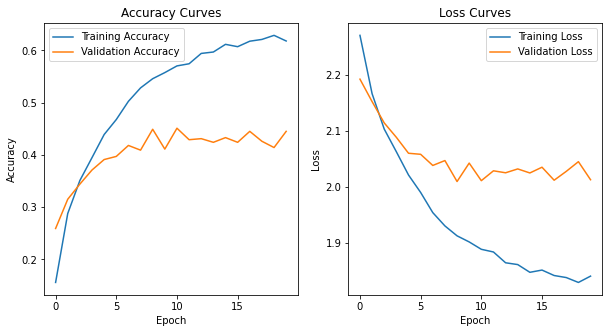

32/32 - 5s - loss: 2.0132 - accuracy: 0.4450
Test accuracy:  44.49999928474426 %
Test loss:  2.0132052898406982


In [18]:
# Accuracy curve
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

# Loss curve
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

test_loss, test_acc = model.evaluate(test_hog_features, test_labels, verbose=2)
print('Test accuracy: ', test_acc*100, '%')
print('Test loss: ', test_loss)

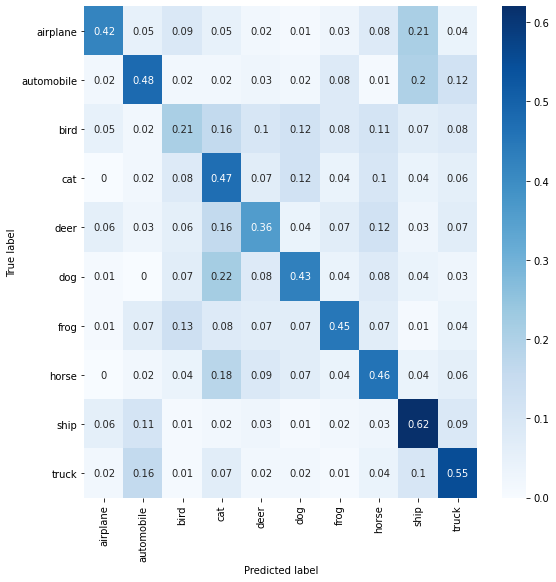

In [19]:
# Confusion matrix diagram [5]
y_pred=model.predict_classes(test_hog_features)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 3 SVM
#### 3.1 Without hog features 

In [24]:
# Load and transpose data to correct format
train_images = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = np.transpose(train_images, [3, 0, 1, 2])
test_images = np.transpose(test_images, [3, 0, 1, 2])

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)
(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [25]:
train_images = train_images.reshape(-1,3072)
test_images = test_images.reshape(-1,3072)

In [26]:
# Fit and predict
clf = svm.SVC()
clf.fit(train_images, train_labels.ravel())
y_pred = clf.predict(test_images)

In [27]:
# Classification report
print("Accuracy: "+str(accuracy_score(test_labels, y_pred)))
print('\n')
print(classification_report(test_labels, y_pred))

Accuracy: 0.482


              precision    recall  f1-score   support

           0       0.52      0.57      0.54       100
           1       0.49      0.49      0.49       100
           2       0.36      0.33      0.35       100
           3       0.39      0.35      0.37       100
           4       0.40      0.45      0.42       100
           5       0.48      0.41      0.44       100
           6       0.54      0.56      0.55       100
           7       0.57      0.43      0.49       100
           8       0.57      0.66      0.61       100
           9       0.48      0.57      0.52       100

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.48      1000
weighted avg       0.48      0.48      0.48      1000



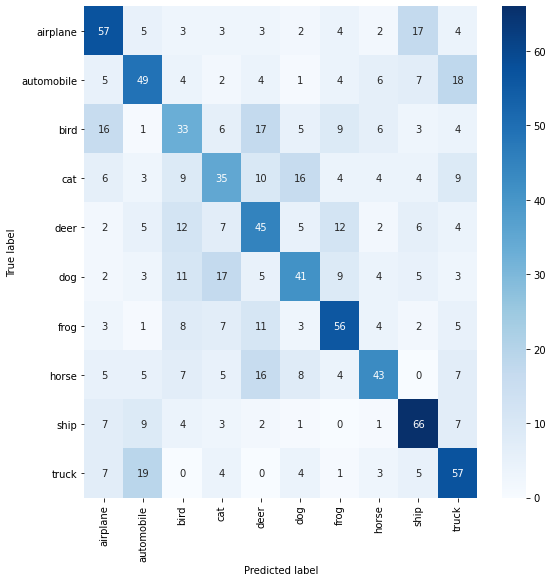

In [38]:
# Plot confusion matrix
classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

con_mat_df = pd.DataFrame(confusion_matrix(test_labels, y_pred), index = classes, columns = classes)
plt.figure(figsize = (8,8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### 3.2 With HOG features

In [40]:
# Load and transpose data to correct format
train_images = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = np.transpose(train_images, [3, 0, 1, 2])
test_images = np.transpose(test_images, [3, 0, 1, 2])

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)
(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [41]:
# Train images to hog features
data_gray = [ color.rgb2gray(i) for i in train_images]
hog_features = []
for image in data_gray:
    hog_feature = skimage.feature.hog(image, orientations=8, pixels_per_cell=(2,2),cells_per_block=(4, 4),block_norm= 'L2',visualize=False)
    hog_features.append(hog_feature)
    
hog_features = np.array(hog_features)

In [42]:
# Test images to hog features
test_data_gray = [ color.rgb2gray(i) for i in test_images]
test_hog_features = []

for test_image in test_data_gray:
    test_hog_feature = skimage.feature.hog(test_image, orientations=8, pixels_per_cell=(2,2),cells_per_block=(4, 4),block_norm= 'L2',visualize=False)
    test_hog_features.append(test_hog_feature)

test_hog_features = np.array(test_hog_features)

In [43]:
# Fit data
clf = svm.SVC()
clf.fit(hog_features, train_labels.ravel())

SVC()

In [44]:
# Predict data
y_pred = clf.predict(test_hog_features)

In [45]:
# Classification report
print("Accuracy: "+str(accuracy_score(test_labels, y_pred)))
print('\n')
print(classification_report(test_labels, y_pred))

Accuracy: 0.521


              precision    recall  f1-score   support

           0       0.62      0.62      0.62       100
           1       0.61      0.56      0.58       100
           2       0.34      0.35      0.35       100
           3       0.37      0.35      0.36       100
           4       0.43      0.52      0.47       100
           5       0.46      0.44      0.45       100
           6       0.55      0.59      0.57       100
           7       0.68      0.52      0.59       100
           8       0.52      0.67      0.59       100
           9       0.73      0.59      0.65       100

    accuracy                           0.52      1000
   macro avg       0.53      0.52      0.52      1000
weighted avg       0.53      0.52      0.52      1000



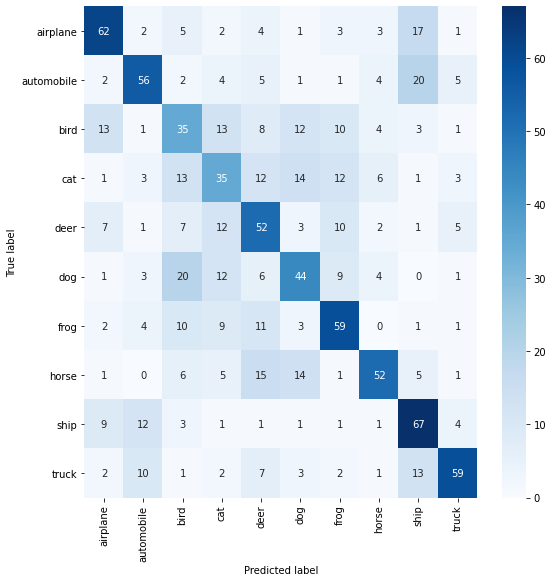

In [46]:
# Plot confusion matrix
classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

con_mat_df = pd.DataFrame(confusion_matrix(test_labels, y_pred), index = classes, columns = classes)
plt.figure(figsize = (8,8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 4. PCA
#### 4.1 Without HOG features

In [47]:
# Load and transpose data to correct format
train_images = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = np.transpose(train_images, [3, 0, 1, 2])
test_images = np.transpose(test_images, [3, 0, 1, 2])

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)
(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [48]:
# Reshaping train images
train_images = train_images/255.0
train_images = train_images.reshape(-1,32,32,3)
train_images_flat = train_images.reshape(-1,3072)

In [49]:
# Reshaping test images
test_images = test_images/255.0
test_images = test_images.reshape(-1,32,32,3)
test_images_flat = test_images.reshape(-1,3072)

In [50]:
# Fit images and count number of components for input shape for NN
pca = PCA(0.9)
pca.fit(train_images_flat)
pca.n_components_

97

In [51]:
# Transform flattened images
train_images_pca = pca.transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)

In [52]:
# Create neural netword layers
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(97,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              100352    
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 1,808,650
Trainable params: 1,808,650
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile and fit data
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images_pca, train_labels, epochs=30, batch_size=128,
                    validation_data=(test_images_pca, test_labels))


Epoch 1/30
79/79 [==============================] - 3s 40ms/step - loss: 2.2530 - accuracy: 0.1817 - val_loss: 2.2158 - val_accuracy: 0.2250
Epoch 2/30
79/79 [==============================] - 2s 22ms/step - loss: 2.1897 - accuracy: 0.2583 - val_loss: 2.1941 - val_accuracy: 0.2520
Epoch 3/30
79/79 [==============================] - 2s 24ms/step - loss: 2.1776 - accuracy: 0.2672 - val_loss: 2.1687 - val_accuracy: 0.2740
Epoch 4/30
79/79 [==============================] - 2s 23ms/step - loss: 2.1642 - accuracy: 0.2849 - val_loss: 2.1546 - val_accuracy: 0.3050
Epoch 5/30
79/79 [==============================] - 2s 23ms/step - loss: 2.1406 - accuracy: 0.3145 - val_loss: 2.1734 - val_accuracy: 0.2740
Epoch 6/30
79/79 [==============================] - 2s 22ms/step - loss: 2.1298 - accuracy: 0.3222 - val_loss: 2.1399 - val_accuracy: 0.3170
Epoch 7/30
79/79 [==============================] - 2s 24ms/step - loss: 2.1147 - accuracy: 0.3387 - val_loss: 2.1233 - val_accuracy: 0.3260
Epoch 8/30
79

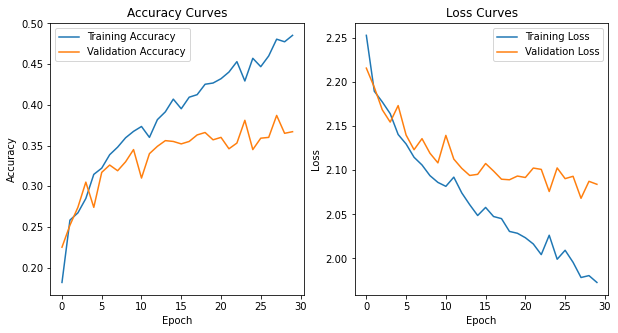

32/32 - 0s - loss: 2.0841 - accuracy: 0.3670
Test accuracy:  36.7000013589859 %
Test loss:  2.0840508937835693


In [54]:
# Accuracy curve
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

# Loss curve
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

test_loss, test_acc = model.evaluate(test_images_pca, test_labels, verbose=2)
print('Test accuracy: ', test_acc*100, '%')
print('Test loss: ', test_loss)

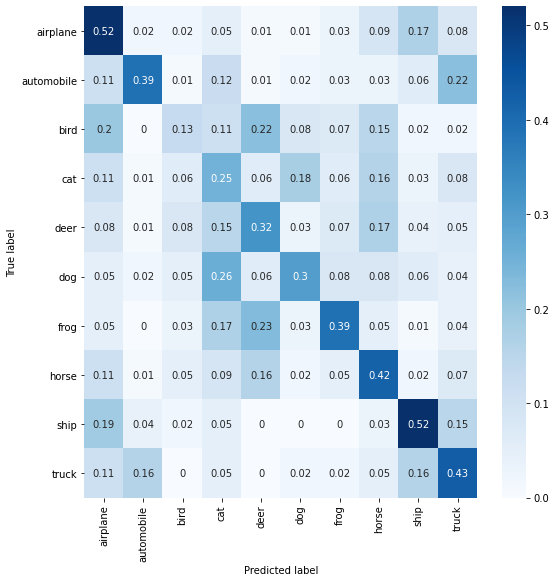

In [55]:
# Confusion matrix diagram [5]
y_pred=model.predict_classes(test_images_pca)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### 4.2 Testing with flattened images

In [56]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(3072,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images_flat, train_labels, epochs=30, batch_size=128,
                    validation_data=(test_images_flat, test_labels))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 4,855,050
Trainable params: 4,855,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
79/79 [==============================] - 4s 55ms/step - loss: 2.2711 - accuracy: 0.1497 - val_loss:

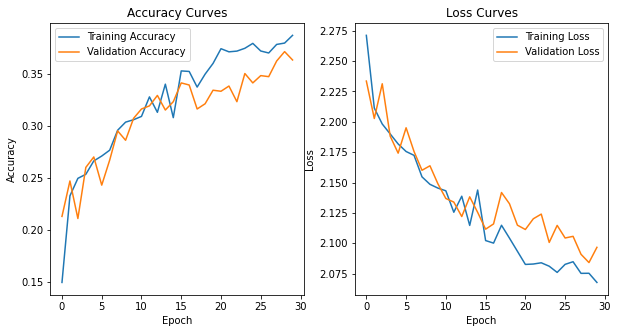

32/32 - 0s - loss: 2.0967 - accuracy: 0.3630
Test accuracy:  36.30000054836273 %
Test loss:  2.096669912338257


In [57]:
# Accuracy curve
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

# Loss curve
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

test_loss, test_acc = model.evaluate(test_images_flat, test_labels, verbose=2)
print('Test accuracy: ', test_acc*100, '%')
print('Test loss: ', test_loss)

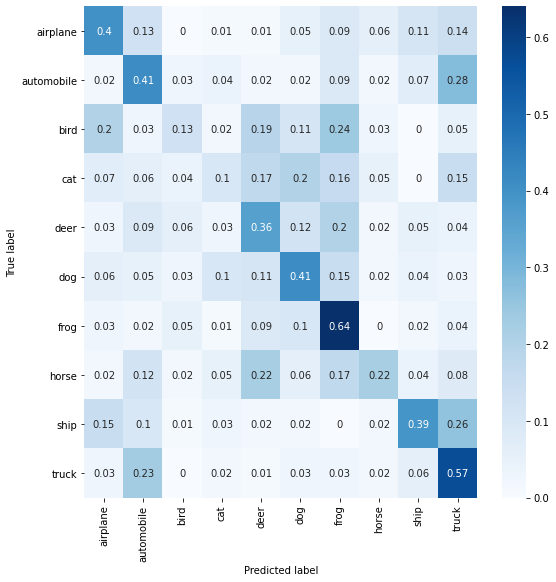

In [58]:
# Confusion matrix diagram [5]
y_pred=model.predict_classes(test_images_flat)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### 4.3 With HOG features

In [59]:
# Load and transpose data to correct format
train_images = np.load('trnImage.npy')
train_labels = np.load('trnLabel.npy')
test_images = np.load('tstImage.npy')
test_labels = np.load('tstLabel.npy')

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = np.transpose(train_images, [3, 0, 1, 2])
test_images = np.transpose(test_images, [3, 0, 1, 2])

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 10000)
(10000, 1)
(32, 32, 3, 1000)
(1000, 1)
(10000, 32, 32, 3)
(1000, 32, 32, 3)


In [60]:
# Training data to hog features
data_gray = [color.rgb2gray(i) for i in train_images]
hog_features = []
for image in data_gray:
    hog_feature = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3])
    hog_features.append(hog_feature)
hog_features = np.array(hog_features)
hog_features.shape

(10000, 15876)

In [61]:
# Test data to hog features
test_data_gray = [color.rgb2gray(i) for i in test_images]
test_hog_features = []
for test_image in test_data_gray:
    test_hog_feature = skimage.feature.hog(test_image, pixels_per_cell=[2,2], cells_per_block=[3,3])
    test_hog_features.append(test_hog_feature)
test_hog_features = np.array(test_hog_features)

In [62]:
# Fit data and count number of components
pca = PCA(0.9)
pca.fit(hog_features)
pca.n_components_

1494

In [63]:
# Transform to pca
hog_features_pca = pca.transform(hog_features)
test_hog_features_pca = pca.transform(test_hog_features)

In [64]:
# Add layers
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(1494,)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1024)              1530880   
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 3,239,178
Trainable params: 3,239,178
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compile and fit data
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(hog_features_pca, train_labels, epochs=20, batch_size=128,
                    validation_data=(test_hog_features_pca, test_labels))

Epoch 1/20
79/79 [==============================] - 5s 59ms/step - loss: 2.1945 - accuracy: 0.2520 - val_loss: 2.1214 - val_accuracy: 0.3310
Epoch 2/20
79/79 [==============================] - 3s 34ms/step - loss: 2.0016 - accuracy: 0.4548 - val_loss: 2.0776 - val_accuracy: 0.3760
Epoch 3/20
79/79 [==============================] - 3s 33ms/step - loss: 1.9010 - accuracy: 0.5564 - val_loss: 2.0614 - val_accuracy: 0.3970
Epoch 4/20
79/79 [==============================] - 3s 34ms/step - loss: 1.8475 - accuracy: 0.6123 - val_loss: 2.0567 - val_accuracy: 0.4030
Epoch 5/20
79/79 [==============================] - 3s 34ms/step - loss: 1.8200 - accuracy: 0.6377 - val_loss: 2.0687 - val_accuracy: 0.3910
Epoch 6/20
79/79 [==============================] - 3s 34ms/step - loss: 1.8165 - accuracy: 0.6430 - val_loss: 2.0728 - val_accuracy: 0.3860
Epoch 7/20
79/79 [==============================] - 3s 35ms/step - loss: 1.7899 - accuracy: 0.6707 - val_loss: 2.0660 - val_accuracy: 0.3930
Epoch 8/20
79

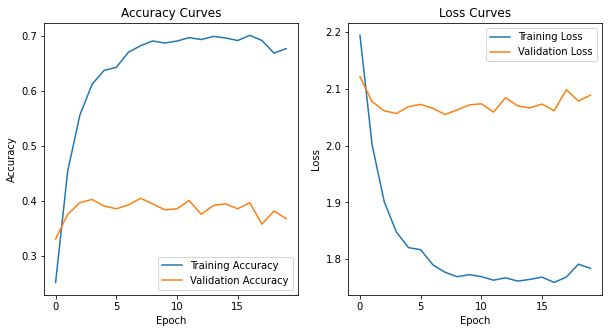

32/32 - 0s - loss: 2.0891 - accuracy: 0.3680
Test accuracy:  36.800000071525574 %
Test loss:  2.089143991470337


In [66]:
# Accuracy curve
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

# Loss curve
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

test_loss, test_acc = model.evaluate(test_hog_features_pca, test_labels, verbose=2)
print('Test accuracy: ', test_acc*100, '%')
print('Test loss: ', test_loss)

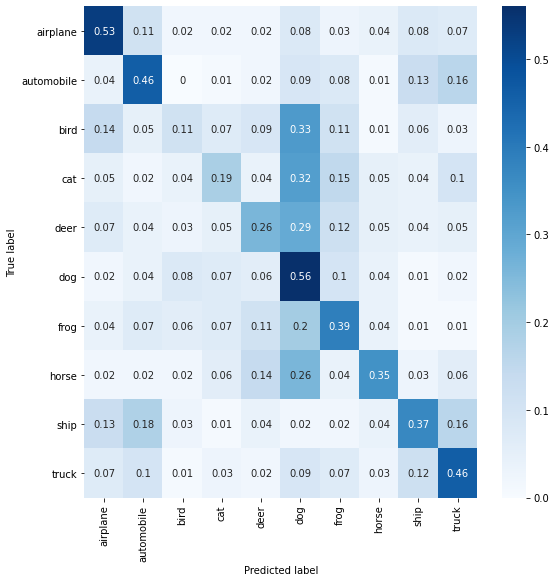

In [67]:
# Confusion matrix diagram [5]
y_pred=model.predict_classes(test_hog_features_pca)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()